<a href="https://colab.research.google.com/github/NimraMushtaq/ml-projects/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Load dataset from MNIST library
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [5]:
# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size = 100)

model.save('mnist_digit_classifier.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8657 - loss: 0.4873
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9707 - loss: 0.0945
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9835 - loss: 0.0538
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9870 - loss: 0.0389
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9912 - loss: 0.0270
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9918 - loss: 0.0243
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9941 - loss: 0.0181
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9943 - loss: 0.0161
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9952 - loss: 0.0153
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9959 - loss: 0.0126


In [6]:
# Loading saved model
model = tf.keras.models.load_model('mnist_digit_classifier.keras')
loss, accuracy = model.evaluate(x_test,y_test)

print("Loss: ",loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9706 - loss: 0.1349
Loss:  0.11584379523992538
Accuracy:  0.9742000102996826


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably a 2


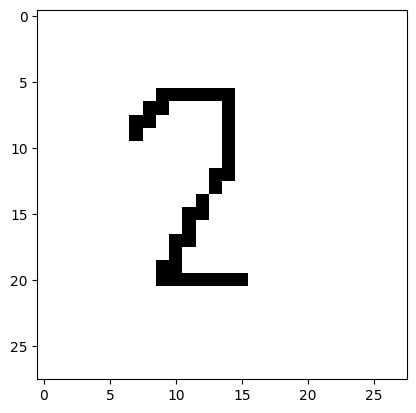

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 3


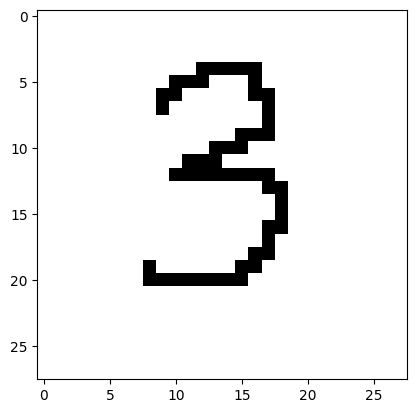

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 1


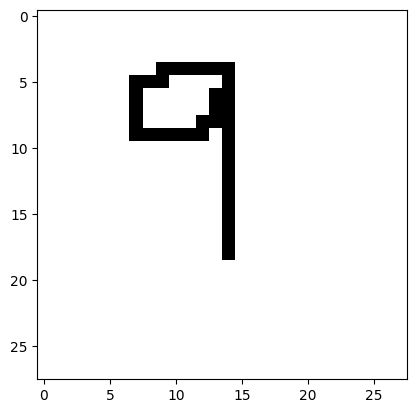

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 1


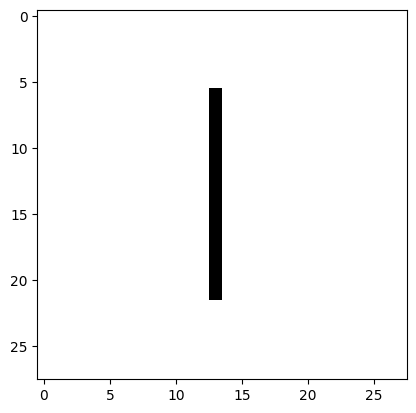

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 8


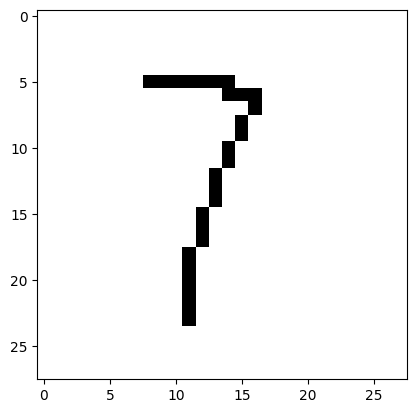

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 7


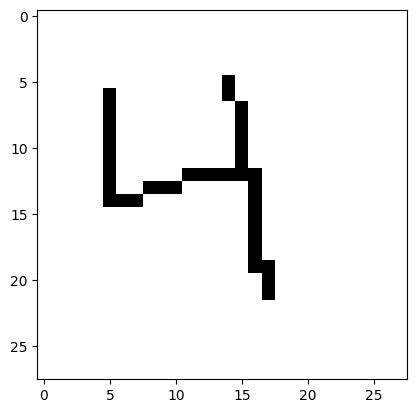

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 4


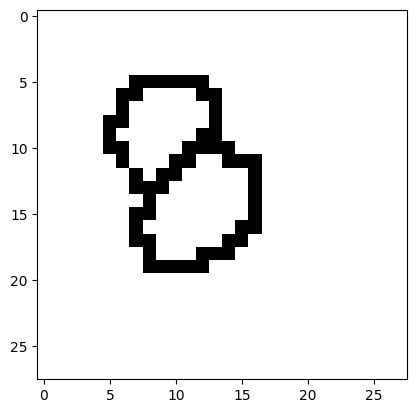

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 2


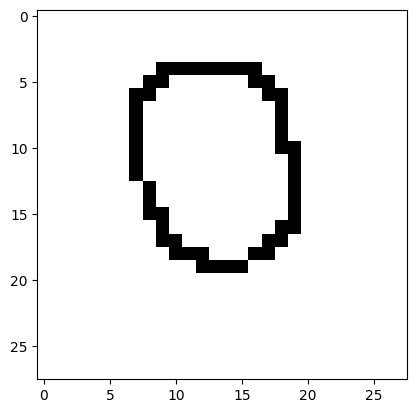

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This digit is probably a 2


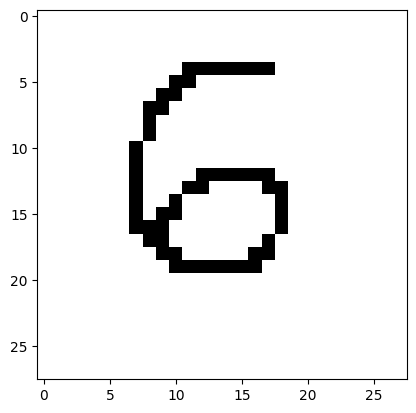

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This digit is probably a 5


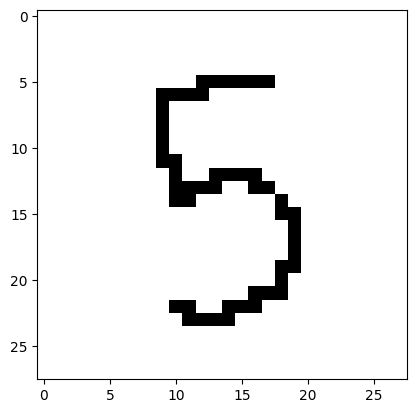

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 2


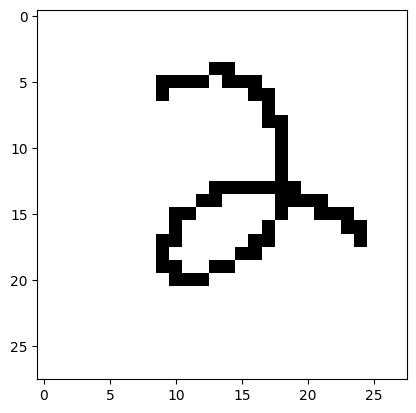

In [15]:
# Testing Model on data
import os
image_number = 1
while os.path.isfile(f'/content/drive/MyDrive/Colab Notebooks/Dataset/Digits/{image_number}.png'):
  try:
    img_path = f'/content/drive/MyDrive/Colab Notebooks/Dataset/Digits/{image_number}.png'
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    # argmax outputs the neuron with highest probability of being correct
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    image_number += 1